In [1]:
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np

sns.set_style("ticks")
%matplotlib inline

In [2]:
anemia_balanced_pres = pd.read_csv('../data/clean/anemia_balanced_pres.csv', index_col=False)
anemia_balanced_pres.head()

,FOLIO_C,INTP,ENTIDAD,NOM_ENT,MUNICI,NOM_MUN,LOCALI,NOM_LOC,ALTITUD,SEXO,...,REGION,AGEB,INDICEF,AFILIACI,NSEDECIL,NSEQUINT,NSETERCI,HB,HBAJUSTA,ANEMIA
0,16061902,3,16,Michoacán de Ocampo,112,Zitácuaro,159,Los Escobales (Quinta Manzana de Crescencio Mo...,2440.0,1,...,2,0046,-2.227128,6,2,1,1,13.8,12.634694,0.0
1,24060397,7,24,San Luis Potosí,14,Coxcatlán,33,Tazaquil,342.0,1,...,2,0016,-2.199538,6,2,1,1,11.3,11.300000,0.0
2,26061345,5,26,Sonora,33,Huatabampo,85,Sirebampo,49.0,1,...,1,0434,-1.087563,6,3,2,1,12.2,12.200000,0.0
3,15060093,6,15,México,14,Atlacomulco,46,San José Toxi,2495.0,2,...,2,0159,-2.721420,2,1,1,1,14.3,13.082307,0.0
4,27061145,9,27,Tabasco,8,Huimanguillo,16,Chontalpa (Estación Chontalpa),40.0,1,...,4,0703,2.342361,6,10,5,3,12.0,12.000000,0.0


In [3]:
anemia_balanced_pres.tail()

,FOLIO_C,INTP,ENTIDAD,NOM_ENT,MUNICI,NOM_MUN,LOCALI,NOM_LOC,ALTITUD,SEXO,...,REGION,AGEB,INDICEF,AFILIACI,NSEDECIL,NSEQUINT,NSETERCI,HB,HBAJUSTA,ANEMIA
3441,27060144,5,27,Tabasco,2,Cárdenas,24,Poblado C-28 Coronel Gregorio Méndez Magaña,11.0,2,...,4,0860,-0.724260,0,4,2,1,9.1,9.100000,1.0
3442,3060402,4,3,Baja California Sur,2,Mulegé,66,Guerrero Negro,9.0,2,...,1,3728,0.759009,6,7,4,2,9.6,9.600000,1.0
3443,22061416,3,22,Querétaro,14,Querétaro,92,El Salitre,1841.0,2,...,2,3079,-0.549147,6,4,2,2,10.2,9.539650,1.0
3444,21061760,7,21,Puebla,164,Tepeaca,26,Vicente Guerrero,2291.0,2,...,4,0081,-2.548375,0,1,1,1,11.0,9.971236,1.0
3445,10060355,5,10,Durango,5,Durango,1,Victoria de Durango,1885.0,2,...,1,2295,1.993812,6,9,5,3,11.2,10.506342,1.0


In [4]:
drop_columns = ['FOLIO_C',  'NOM_ENT',  'NOM_MUN', 'NOM_LOC', 
                'FECHA_NA', 'FECHA_VI', 'EST_DIS', 'NSEDECIL',
                'NSEQUINT', 'NSETERCI', 'HEMCAP']
anemia_balanced_pres = anemia_balanced_pres.drop(drop_columns, axis=1)

In [5]:
anemia_balanced_pres.head()

,INTP,ENTIDAD,MUNICI,LOCALI,ALTITUD,SEXO,EDADDIAS,EDAD,MESES,CODE_UPM,...,PONDEF,EST_VAR,AREA,REGION,AGEB,INDICEF,AFILIACI,HB,HBAJUSTA,ANEMIA
0,3,16,112,159,2440.0,1,1122.0,3.071868,36.862423,R1620,...,629.221,162.0,2,2,0046,-2.227128,6,13.8,12.634694,0.0
1,7,24,14,33,342.0,1,695.0,1.902806,22.833675,M2410,...,292.946,242.0,2,2,0016,-2.199538,6,11.3,11.300000,0.0
2,5,26,33,85,49.0,1,1039.0,2.844626,34.135524,M2632,...,232.242,262.0,2,1,0434,-1.087563,6,12.2,12.200000,0.0
3,6,15,14,46,2495.0,2,1352.0,3.701574,44.418891,M1503,...,2982.802,152.0,2,2,0159,-2.721420,2,14.3,13.082307,0.0
4,9,27,8,16,40.0,1,665.0,1.820670,21.848049,M2734,...,1058.066,273.0,1,4,0703,2.342361,6,12.0,12.000000,0.0


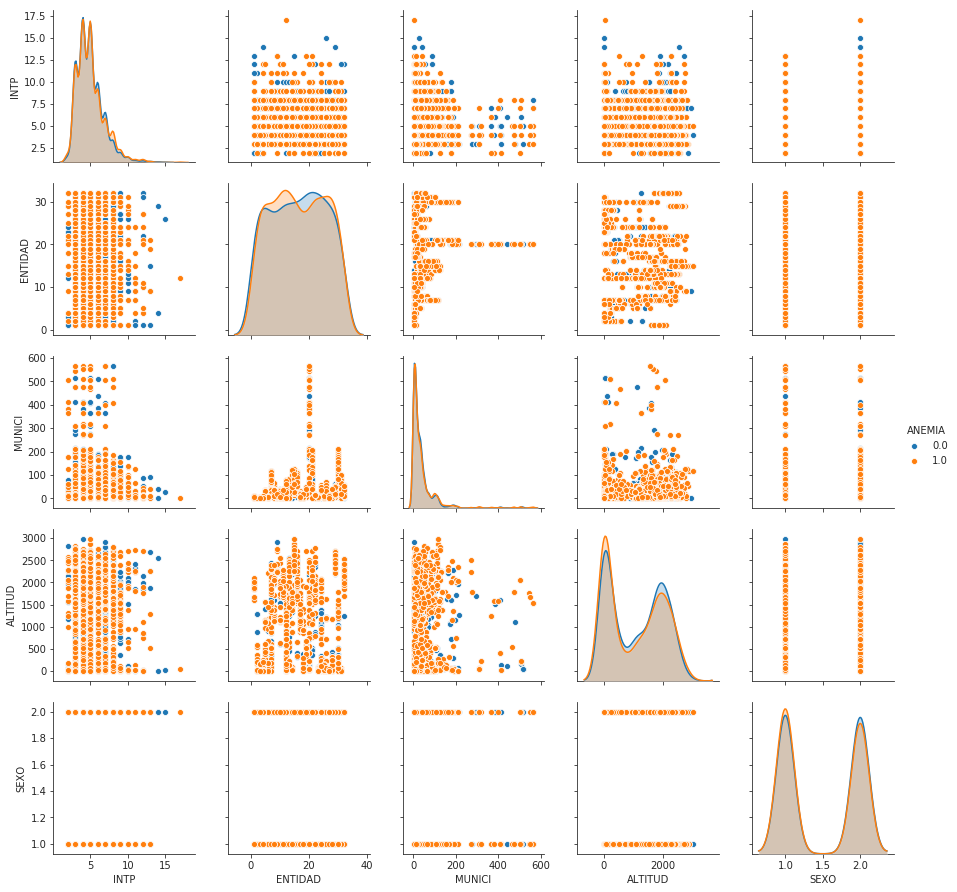

In [6]:
sns.pairplot(anemia_balanced_pres, hue='ANEMIA', vars=['INTP', 'ENTIDAD',  'MUNICI', 'ALTITUD', 'SEXO'])

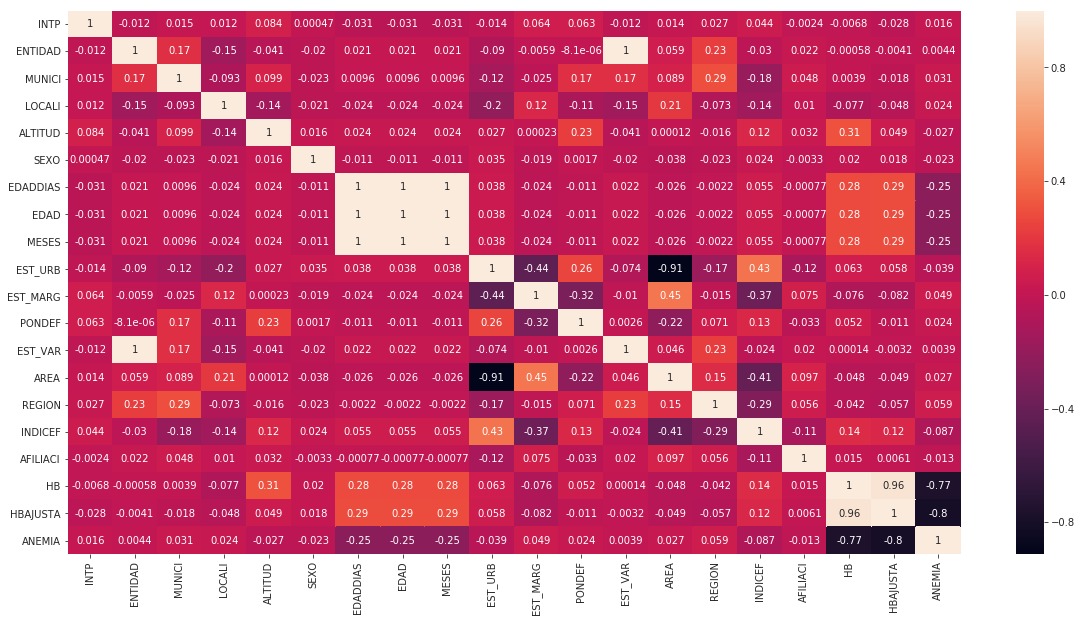

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(anemia_balanced_pres.corr(), annot=True)

In [8]:
to_drop2 = ['EDAD', 'MESES', 'EST_VAR', 'HBAJUSTA', 'CODE_UPM', 'AGEB']
anemia_balanced_pres = anemia_balanced_pres.drop(to_drop2, axis=1)

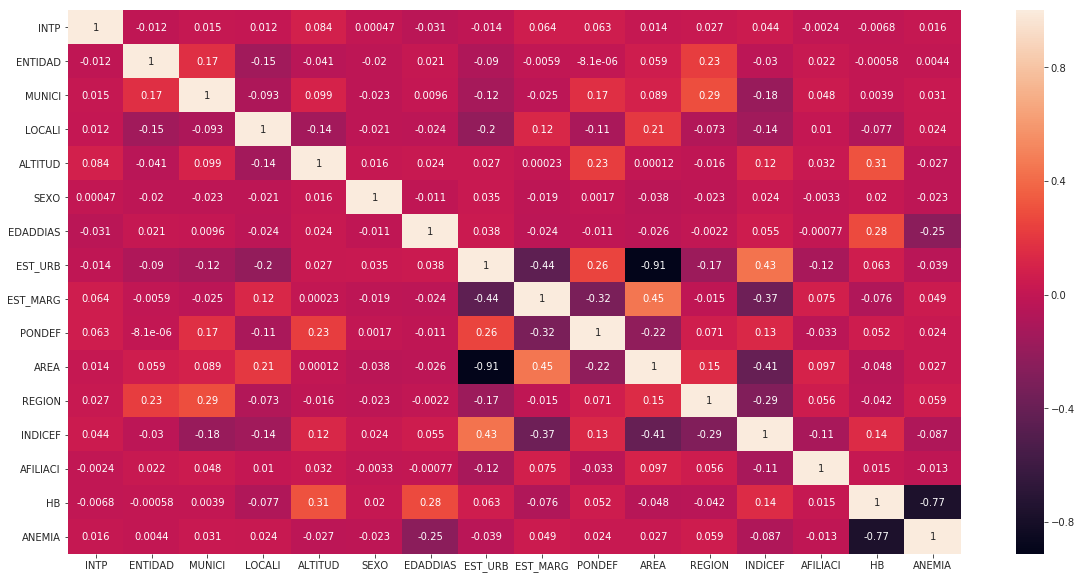

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(anemia_balanced_pres.corr(), annot=True)

# Feature Selection 

In [10]:
#Correlation with output variable
cor_target = abs(anemia_balanced_pres["ANEMIA"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features.head()

1723    1.0
1724    1.0
1725    1.0
1726    1.0
1727    1.0
Name: ANEMIA, dtype: float64

In [11]:
anemia_balanced_pres.to_csv('../data/clean/anemia_balanced_clean.csv', index=False)
anemia_balanced_pres.head()

,INTP,ENTIDAD,MUNICI,LOCALI,ALTITUD,SEXO,EDADDIAS,EST_URB,EST_MARG,PONDEF,AREA,REGION,INDICEF,AFILIACI,HB,ANEMIA
0,3,16,112,159,2440.0,1,1122.0,1.0,2.0,629.221,2,2,-2.227128,6,13.8,0.0
1,7,24,14,33,342.0,1,695.0,1.0,2.0,292.946,2,2,-2.199538,6,11.3,0.0
2,5,26,33,85,49.0,1,1039.0,1.0,2.0,232.242,2,1,-1.087563,6,12.2,0.0
3,6,15,14,46,2495.0,2,1352.0,1.0,2.0,2982.802,2,2,-2.721420,2,14.3,0.0
4,9,27,8,16,40.0,1,665.0,2.0,1.0,1058.066,1,4,2.342361,6,12.0,0.0


In [12]:
anemia_balanced_pres.dtypes

INTP          int64
ENTIDAD       int64
MUNICI        int64
LOCALI        int64
ALTITUD     float64
SEXO          int64
EDADDIAS    float64
EST_URB     float64
EST_MARG    float64
PONDEF      float64
AREA          int64
REGION        int64
INDICEF     float64
AFILIACI      int64
HB          float64
ANEMIA      float64
dtype: object

In [13]:
#anemia_balanced_pres['AGEB'] = anemia_balanced_pres['AGEB'].apply(pd.to_numeric)

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
x_values = anemia_balanced_pres.drop(columns=["ANEMIA"])
y_values = anemia_balanced_pres["ANEMIA"]
# feature ex_valuestraction
fit = SelectKBest(score_func=f_classif, k=4).fit(x_values, y_values)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(x_values)
# summarize selected features
print(features[0:5,:])

[  8.783e-01   6.793e-02   3.211e+00   2.006e+00   2.429e+00   1.767e+00
   2.246e+02   5.149e+00   8.276e+00   1.924e+00   2.452e+00   1.187e+01
   2.656e+01   5.767e-01   4.917e+03]
[[  1.122e+03   2.000e+00  -2.227e+00   1.380e+01]
 [  6.950e+02   2.000e+00  -2.200e+00   1.130e+01]
 [  1.039e+03   1.000e+00  -1.088e+00   1.220e+01]
 [  1.352e+03   2.000e+00  -2.721e+00   1.430e+01]
 [  6.650e+02   4.000e+00   2.342e+00   1.200e+01]]
